In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_excel('/content/Newiris.xls')

In [3]:
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
data.shape

(150, 5)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
data.isnull().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [ ]:
data.isnull().sum().sum()

19

In [ ]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

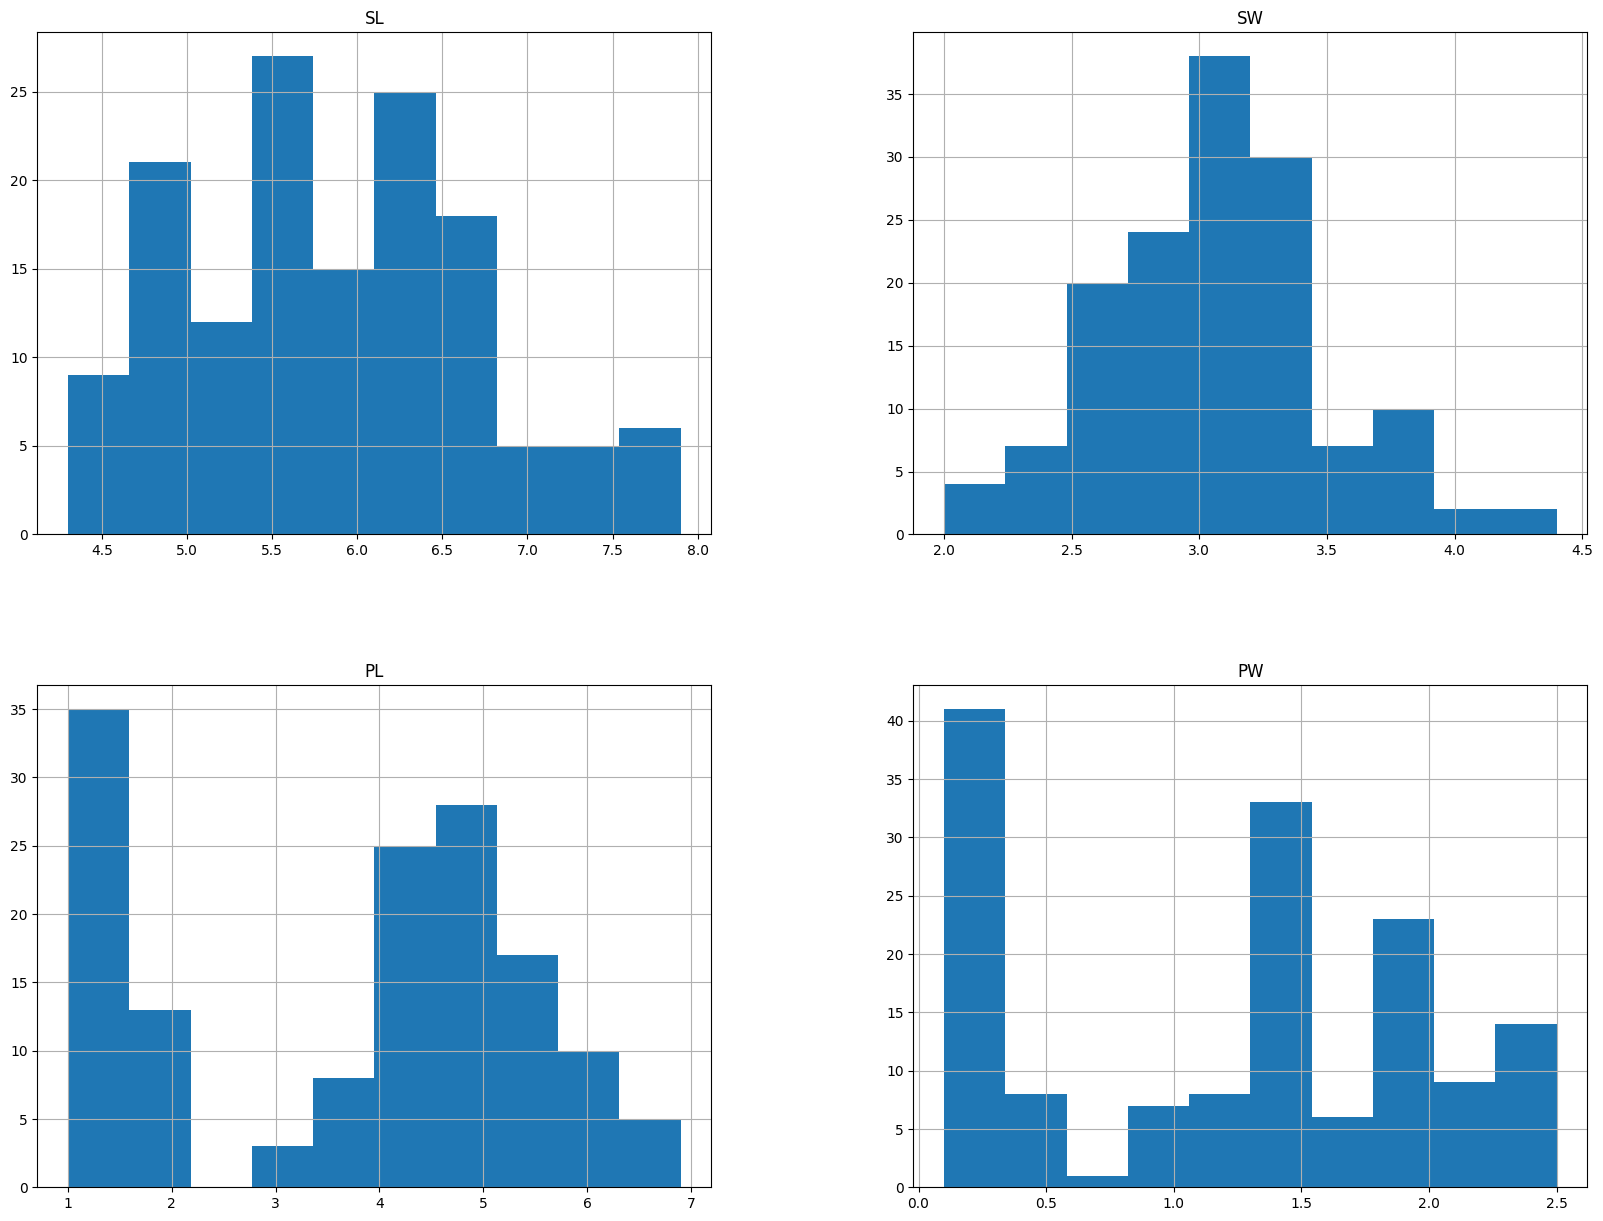

In [4]:
freqgraph=data.select_dtypes(include='float64')
freqgraph.hist(figsize=(20,15))
plt.show()

**Data Preprocessing**
-**Imputation**

In [5]:
#null values are filled with mean
for col in ['SL','SW','PL']:
  data[col]=data[col].fillna(data[col].mean())

In [6]:
data.head()

,SL,SW,PL,PW,Classification
0,5.100000,3.5,1.4,0.2,Iris-setosa
1,4.900000,3.0,1.4,0.2,Iris-setosa
2,5.855944,3.2,1.3,0.2,Iris-setosa
3,4.600000,3.1,1.5,0.2,Iris-setosa
4,5.000000,3.6,1.4,0.2,Iris-setosa


In [ ]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

**Managing Outliers**

In [7]:
num_cols=['SL','SW','PL','PW']
num_cols

['SL', 'SW', 'PL', 'PW']

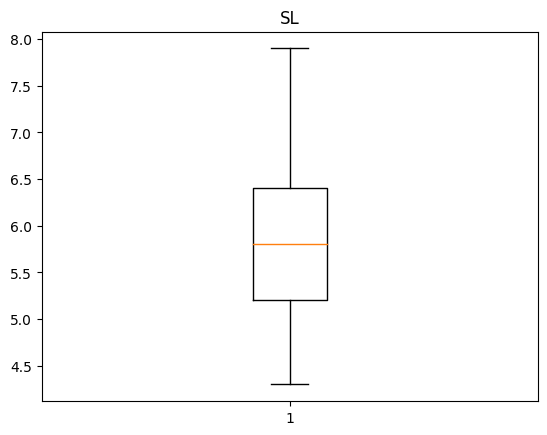

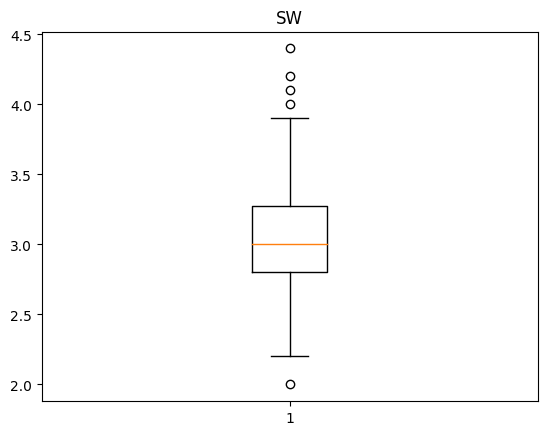

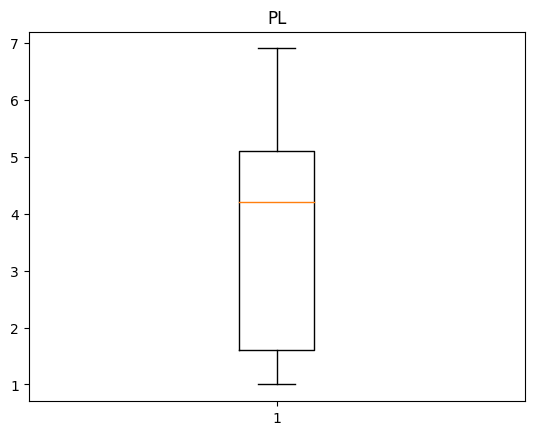

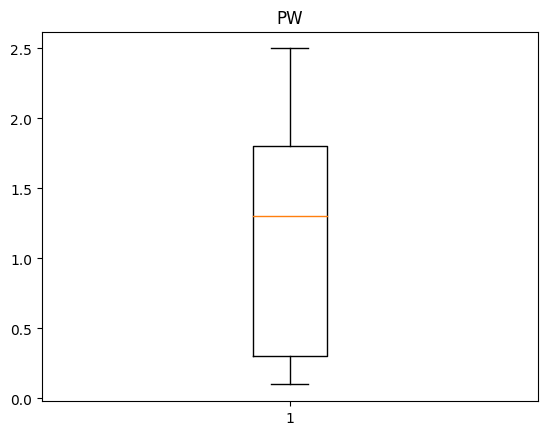

In [8]:
for i in num_cols:
 plt.figure()
 plt.boxplot(data[i])
 plt.title(i)

In [9]:
#Here SW is considered with outliers
Q1=np.percentile(data['SW'],25,method = 'midpoint')
Q2=np.percentile(data['SW'],50,method = 'midpoint')
Q3=np.percentile(data['SW'],75,method = 'midpoint')
print (Q1)
print(Q2)
print(Q3)

2.8
3.0
3.25


In [10]:
IQR= Q3-Q1
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR
print("min is", low_lim)
print("max is", up_lim)

min is 2.1249999999999996
max is 3.9250000000000003


In [11]:
outlier =[]
for x in data['SW']:
  if ((x>up_lim) or (x<low_lim)):
    outlier.append(x)

In [12]:
outlier

[4.0, 4.4, 4.1, 4.2, 2.0]

In [13]:
ind1 = data['SW']>up_lim
data.loc[ind1].index

Int64Index([14, 15, 32, 33], dtype='int64')

In [14]:
data.drop([15, 68, 73, 141, 144],inplace=True)

In [15]:
data.head(25)

,SL,SW,PL,PW,Classification
0,5.100000,3.500000,1.4,0.2,Iris-setosa
1,4.900000,3.000000,1.4,0.2,Iris-setosa
2,5.855944,3.200000,1.3,0.2,Iris-setosa
3,4.600000,3.100000,1.5,0.2,Iris-setosa
4,5.000000,3.600000,1.4,0.2,Iris-setosa
5,5.400000,3.900000,1.7,0.4,Iris-setosa
6,4.600000,3.400000,1.4,0.3,Iris-setosa
7,5.000000,3.400000,1.5,0.2,Iris-setosa
8,4.400000,2.900000,1.4,0.2,Iris-setosa
9,4.900000,3.100000,1.5,0.1,Iris-setosa


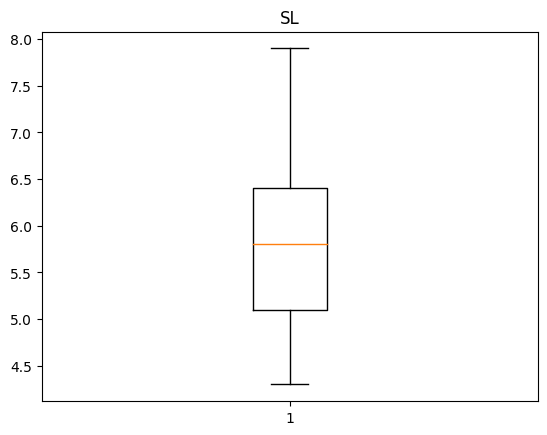

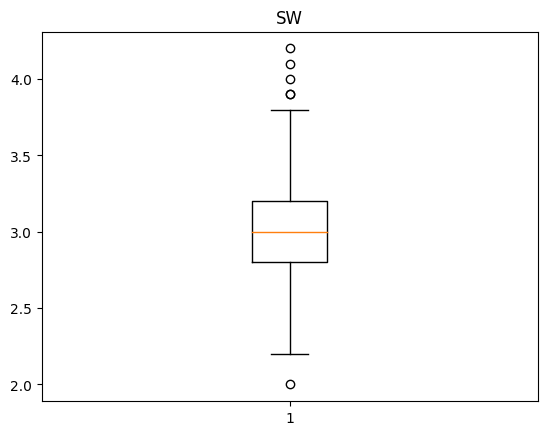

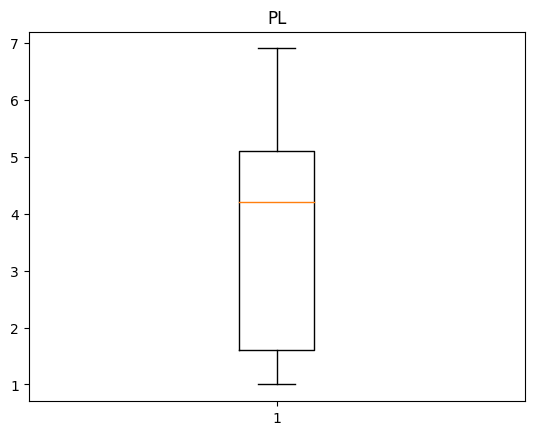

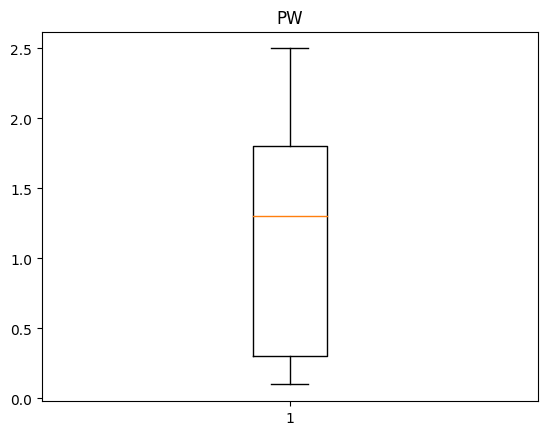

In [16]:
for i in num_cols:
 plt.figure()
 plt.boxplot(data[i])
 plt.title(i)

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
le = LabelEncoder()

In [19]:
data['Classification'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [20]:
data['Classification']= le.fit_transform(data['Classification'])

In [21]:
data['Classification'].unique()

array([0, 1, 2])

In [22]:
data.head()

,SL,SW,PL,PW,Classification
0,5.100000,3.5,1.4,0.2,0
1,4.900000,3.0,1.4,0.2,0
2,5.855944,3.2,1.3,0.2,0
3,4.600000,3.1,1.5,0.2,0
4,5.000000,3.6,1.4,0.2,0


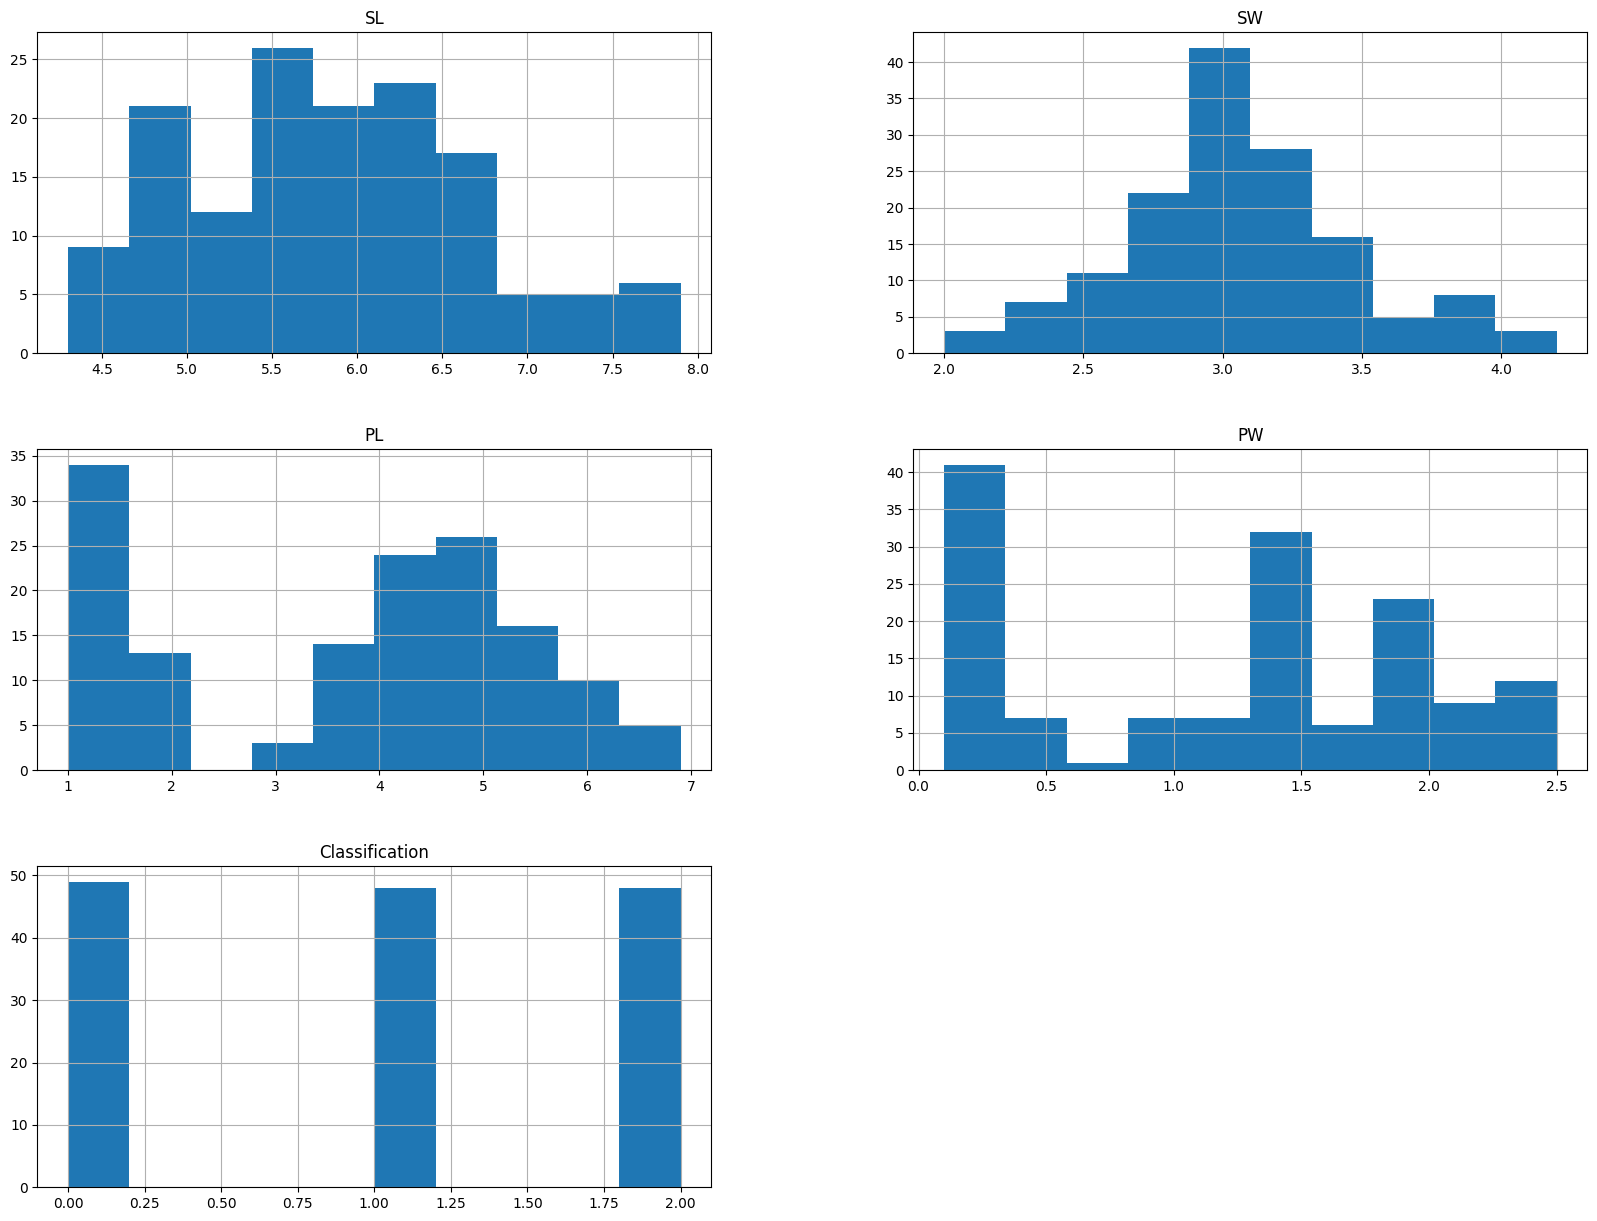

In [23]:
data.hist(figsize=(20,15))
plt.show()

<Axes: >

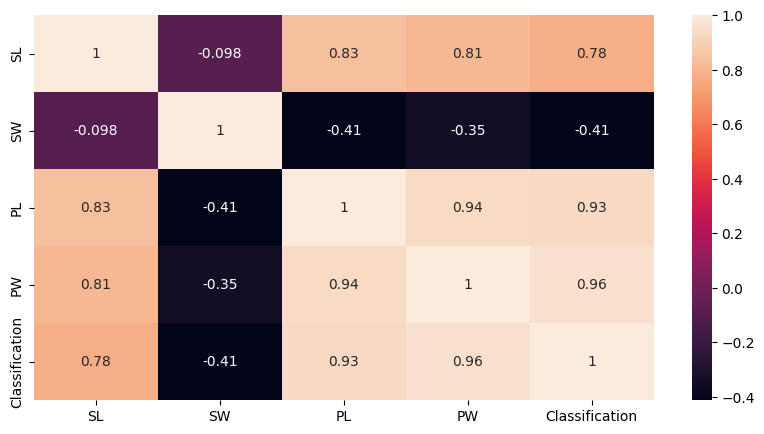

In [24]:
corrmatrix = data.corr()
plt.subplots(figsize=(10,5))
sns.heatmap(corrmatrix, annot = True)

In [25]:
y = data['Classification']

In [26]:
x = data.drop(['Classification'],axis=1)

In [ ]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Classification, Length: 145, dtype: int64

In [ ]:
x

,SL,SW,PL,PW
0,5.100000,3.5,1.40000,0.2
1,4.900000,3.0,1.40000,0.2
2,5.855944,3.2,1.30000,0.2
3,4.600000,3.1,1.50000,0.2
4,5.000000,3.6,1.40000,0.2
...,...,...,...,...
145,6.700000,3.0,5.20000,2.3
146,6.300000,2.5,5.00000,1.9
147,6.500000,3.0,3.75625,2.0
148,6.200000,3.4,5.40000,2.3


In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .20,random_state=42)

In [28]:
from sklearn import linear_model
lr = linear_model.LinearRegression()

In [29]:
model = lr.fit(x_train,y_train)

In [30]:
predictions = model.predict(x_test)

In [31]:
predictions

array([ 1.16263269,  2.05852044,  0.07085544, -0.0519903 ,  0.34035029,
        2.05447691,  1.51789493,  1.77949655,  1.29482619, -0.06954976,
       -0.09021977,  1.30471447,  1.74975792,  0.95533865,  1.31620969,
       -0.10160153,  2.0158564 ,  2.07566886,  1.67024443,  2.00596392,
        1.16373093,  1.88704621, -0.07462292,  0.92743337, -0.29694381,
       -0.14784205,  1.3486525 ,  0.90761514,  2.1529315 ])

In [32]:
from sklearn.metrics import mean_squared_error,r2_score
print ('MSE is: \n', mean_squared_error(y_test, predictions))

MSE is: 
 0.04254464867465782


In [33]:
print ('R2 score is: \n', r2_score(y_test, predictions))

R2 score is: 
 0.9378818584455083


In [34]:
y_predictions=model.predict(x_test)

In [35]:
y_predictions

array([ 1.16263269,  2.05852044,  0.07085544, -0.0519903 ,  0.34035029,
        2.05447691,  1.51789493,  1.77949655,  1.29482619, -0.06954976,
       -0.09021977,  1.30471447,  1.74975792,  0.95533865,  1.31620969,
       -0.10160153,  2.0158564 ,  2.07566886,  1.67024443,  2.00596392,
        1.16373093,  1.88704621, -0.07462292,  0.92743337, -0.29694381,
       -0.14784205,  1.3486525 ,  0.90761514,  2.1529315 ])

**kNN**

In [71]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [72]:
from sklearn.neighbors import KNeighborsClassifier

In [79]:
metric_k = []
neighbors=np.arange(3,8)

In [80]:
for k in neighbors:
  classifier = KNeighborsClassifier(n_neighbors= k, metric = 'euclidean')
  classifier.fit(x_train,y_train)
  y_pred = classifier.predict(x_test)
  acc = accuracy_score(y_test,y_pred)
  metric_k.append(acc)

In [81]:
metric_k

[0.9655172413793104,
 0.9655172413793104,
 0.9655172413793104,
 0.9655172413793104,
 0.9655172413793104]

In [70]:
classifier = KNeighborsClassifier(n_neighbors= 5, metric = 'euclidean')
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)
acc = accuracy_score(y_test,y_pred)
metric_k.append(acc)

In [ ]:
print('Accuracy = ',accuracy_score(y_test,y_pred))


Accuracy =  0.9655172413793104


**SVM**

In [41]:
from sklearn.svm import SVC

In [44]:
svm_cls = SVC (kernel ='linear')
svm_cls = svm_cls.fit(x_train,y_train)
y_predictions_svm = svm_cls.predict(x_test)

In [45]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [46]:
confusion_matrix(y_test,y_predictions_svm)

array([[ 9,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

In [48]:
accuracy_score(y_test,y_predictions_svm)

1.0

In [49]:
svm_cls = SVC (kernel ='rbf')
svm_cls = svm_cls.fit(x_train,y_train)
y_predictions_svm = svm_cls.predict(x_test)

In [50]:
confusion_matrix(y_test,y_predictions_svm)

array([[ 8,  1,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

In [51]:
accuracy_score(y_test,y_predictions_svm)

0.9655172413793104

Here Accuracy score has been decreased

**Decision Tree**

In [52]:
from sklearn.tree import DecisionTreeClassifier

In [53]:
dt_cls = DecisionTreeClassifier()
model = dt_cls.fit(x_train,y_train)
y_pred_dt = model.predict(x_test)


In [54]:
confusion_matrix(y_test,y_pred_dt)

array([[ 9,  0,  0],
       [ 0,  9,  0],
       [ 0,  1, 10]])

In [55]:
accuracy_score(y_test,y_pred_dt)

0.9655172413793104

**Random Forest**

In [56]:
from sklearn.ensemble import RandomForestClassifier

In [60]:
rf_cls = RandomForestClassifier(n_estimators= 12)
model_rf = rf_cls.fit(x_train,y_train)
y_pred_rf = model_rf.predict(x_test)

In [61]:
confusion_matrix(y_test,y_pred_rf)

array([[ 9,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

In [62]:
accuracy_score(y_test,y_pred_rf)

1.0